# Lab 1. PyTorch and ANNs

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to `File -> Print` and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

**Adjust the scaling to ensure that the text is not cutoff at the margins.**

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: [Colab Link](https://colab.research.google.com/drive/1js0mHCq-K567F3PF_Fsx8nUixk7aKUMl)

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [27]:
def sum_of_cubes(n):
    if type(n) != int or n<=0:
      print("Invalid input")
      return -1;
    sum = (n *( n + 1 ) / 2)

    return sum*sum 

### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [15]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the words in the string, using sep as the delimiter string.
    
    sep
      The delimiter according which to split the string.
      None (the default value) means split according to any whitespace,
      and discard empty strings from the result.
    maxsplit
      Maximum number of splits to do.
      -1 (the default value) means no limit.



In [31]:
def word_lengths(sentence):
    ret = []
    words = sentence.split(' ')
    for word in words:
      ret.append(len(word))

    return ret

word_lengths("welcome to APS360!")

[7, 2, 7]

### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [32]:
def all_same_length(sentence):
    lens = word_lengths(sentence)
    lens_set = set(lens)

    if len(lens_set) == 1:
      return True
    return False
  
all_same_length("Hey ho here we go")

False

## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [33]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [34]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [35]:
matrix.size

12

In [36]:
matrix.shape

(3, 4)

In [37]:
vector.size

4

In [38]:
vector.shape

(4,)

EXPLANATION: Both matrix.size and vector.size return the total number of elements in the matrix/vector. Regardless of how these elements are organized.
Natrix.shape return a tuple containing the number of rows and columns(in that order). Vector.shape also returns the dimensions and here because it's a vector it's returning 4 rows and one column. (Despite how the code looks like 1 row with 4 columns, vectors or one dimensional arrays are considered one column)

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [55]:
def matrix_vector_multip(matrix, vector):
  results = []
  for i in range(len(matrix)):
      item = 0
      for j in range(len(vector)):
          item += matrix[i][j] * vector[j]
      results.append(item)

  return np.array(results)

output = matrix_vector_multip(matrix,vector)

In [56]:
output

array([ 4.,  8., -3.])

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [57]:
output2 = np.dot(matrix,vector)

In [58]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [59]:
(output == output2).all()

True

### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [60]:
import time
def runtime(func, matrix, vector):
  # record the time before running code
  start_time = time.time()

  # place code to run here
  func(matrix, vector)
      
  # record the time after the code is run
  end_time = time.time()

  # compute the difference
  diff = end_time - start_time
  
  return diff

In [64]:
runtime(matrix_vector_multip, matrix, vector)

4.410743713378906e-05

In [66]:
runtime(np.dot, matrix, vector)

3.5762786865234375e-05

The dot operator is faster than the for loop as shown above.

## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [42]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [43]:
img = plt.imread("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

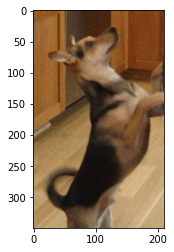

In [44]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

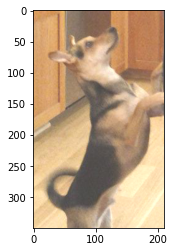

In [45]:
img_add = img + 0.25
img_add = np.clip(img_add, 0, 1)
plt.imshow(img_add)

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

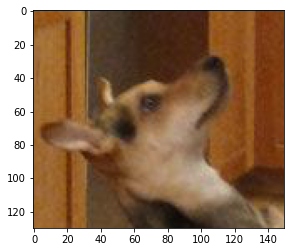

In [46]:
img_cropped = img[0:130, 20:170, :3]
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [47]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [48]:
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [49]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

150x130x3 = 58500 numbers are stored in img_torch

### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [50]:
img_torch.shape
img_torch.transpose(0,2).shape


torch.Size([3, 150, 130])

Returns a tensor that is a transposed version of original, but the given dimensions 0 and 2 are swapped. The values in the tensor don't change but their arrangement does. The new tensor has shape [3, 150, 130] as supposed to [130, 150, 3] from before. This operation doesn't permanently change the original tensor, just returns the new version.

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [51]:
img_torch.unsqueeze(0).shape

torch.Size([1, 130, 150, 3])

Returns a new tensor with a dimension of size one inserted at the indicated position. The tensor that is returned shares the same underlying data with this original one. The new shape is [1, 130, 150, 3] as suppose to [130, 150, 3] from before.

### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [52]:
r = torch.max(img_torch[:,:,0])
b = torch.max(img_torch[:,:,1])
g = torch.max(img_torch[:,:,2])
max_color = [r,b,g]
max_color

[tensor(0.8941), tensor(0.7882), tensor(0.6745)]

## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate

Please select at least three different options from the list above. For each option, please select two to three different parameters and provide a table. 


In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1) #we can change the relu activation function to tanh and sigmoid here
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)  # we can change the learning rate by adjusting the lr here

# for i in range(10): This line would change the number of iterations
for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Training Error Rate: 0.073
Training Accuracy: 0.927
Test Error Rate: 0.117
Test Accuracy: 0.883


The tables below summerize the chages in number of iterations, activation function and learning rate. The comments in the code indicate what about the code was changed to adjust these parameters.

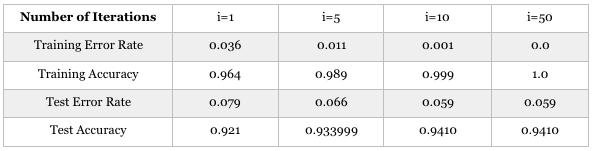

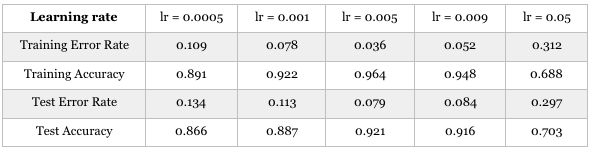

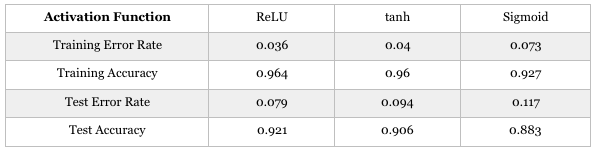

### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

When changing the activation function, there's not much difference between ReLU and tanh (both 96% accurate) but sigmoid does lower the accuracy (to 88.3%). 
In terms of the learning rate, it seems that the original 0.005 is the optimal learning rate which gives us an accuracy of 96%. Increasing the learning rate, as seen in the data, lowers the accuracy and we may skip the optimal solution, decreasing the learning rate too much will lower the efficiency as we would need many iterations.
Number of iterations and training accuracy are directly proportional, and with 50 iterations we could reach 100% accuracy which means that we have overfitted.
So the max accuracy without overfitting is 96% and with overfitting 100%.

### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

When changing the activation function, test accuracy is highest with ReLU with 92% accuracy followed by tanh with 90.6% and sigmoid with 88.3%. So no drastic improvements when changing the activation function.
In terms of the learning rate, similar to training accuracy, the max accuracy of 92% is achieved with lr=0.005. Lastly, we can see that even though we reached 100% accuracy in the training data by increasing the number of iterations, we can't excede 94% in the test data. That's because overfitting to the training data (getting 100% accuracy) doesn't generalize well. So max accuracy reached was 94% by increasing the number of iterations to 10.

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

We should use results from part b because we want max accuracy on data we haven't seen before (testing data) since that indicates that our model can generalize well. Training data accuracy becomes meaningless after a certain point (when we go in the overfitting zone).